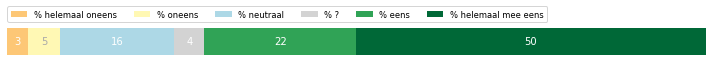

In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# dit zijn de waardes uit de file
CATEGORY_NAMES = { 0: 'onbekend',
                   1: 'helemaal oneens',
                   2: 'oneens',
                   3: 'neutraal',
                   4: 'eens',
                   5: 'helemaal mee eens',
                   6: '?'}

# dit zijn de categorie namen voor het plaatje
CATEGORY_NEW =   { 0: '% onbekend',
                   1: '% helemaal oneens',
                   2: '% oneens',
                   3: '% neutraal',
                   4: '% ?',
                   5: '% eens',
                   6: '% helemaal mee eens'}

QUESTIONMARK = 3 # drie omdat de index met 0 begint, dus eigenlijk categorie 4

def read_file(f):
    """functie om de file te lezen en in dataframe te zetten"""
    df = pd.read_csv(f, delimiter = ';')
    return df

def map_nr(df):
    """ functie om de weet niet in het midden te krijgen"""
    #neem de eerste kolom uit de file en map de inhoud 
    df.iloc[:,0] = df.iloc[:,0].map({0:0,
                                     1:1, 
                                     2:2,
                                     3:3,
                                     4:5,
                                     5:6,
                                     6:4})
    return df
    


def fill_array(df, colno):
    """
    Function to fill an array y with the numbers of occurrence per category
    it uses parameters:
    --------
    df: dataframe from file
    colno: collumno of the dataframe (usally a survey question)
    y: an array with all the counts per outcome in percentage
    """
    # get all the values from a column
    x = np.array(np.array(df.iloc[:,[colno]].dropna().astype(int)))
    # get unique answers and amount per unique answers
    unique_elements, counts_elements = np.unique(x, return_counts=True)
    # compose array with amount per answer
    y = np.array([0,0,0,0,0,0,0])
    for idx, i in enumerate(unique_elements):
        y[i] = counts_elements[idx]
    y_perc = np.array([i/y.sum()*100 for i in y])

    return y_perc


def survey(results, category_names):
    """
    This funtion creates the graph. It uses the following parameters:
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.35, 1, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 1))
    #ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    # remove all the ticks (both axes), and tick labels on the Y axis
    ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)


    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
      
        if i ==  2:  # 'neutraal'
            ax.barh(labels, widths, left=starts, height=0.5,
                    label=colname, color='lightblue')
            xcenters = starts + widths / 2
        elif i ==  3:  # display bars with 'weet niet'
            ax.barh(labels, widths, left=starts, height=0.5,
                    label=colname, color='lightgrey')
            xcenters = starts + widths / 2
        else:
            ax.barh(labels, widths, left=starts, height=0.5,
                    label=colname, color=color) # color is red to green
            xcenters = starts + widths / 2

        #tekst color
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            if c != 0:
                ax.text(x, y, str(int(round(c))), ha='center', va='center',color=text_color)

    ax.legend(ncol=len(category_names), bbox_to_anchor=(-0.006, 1),loc='lower left', fontsize='small')
    return fig, ax

################################################################
# Deze naam alleen maar veranderen
f = 'palmoliecleanC.csv'

################################################################

df = read_file(f)
df = map_nr(df)
df.head()
results = {i : fill_array(df, i)[1:] for i in range(0, 1)}
category_names = [CATEGORY_NEW[i] for i in CATEGORY_NEW][1:]
fig, ax = survey(results, category_names)
plt.tight_layout()
plt.savefig(f[:-4])



